In [4]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit



ais = pd.read_csv('training_set.csv', index_col=0, parse_dates = ['timestamp'])


In [5]:
ais_moving = ais[(ais.speed > 0.1)]

In [6]:
print(len(ais.mmsi))
print(len(ais_moving.mmsi))

1048575
735616


In [7]:
ais.head()

timestamp       mmsi        lat        lon  speed  course  \
0 2017-02-11 11:19:00  205366000  54.347242   9.991140   4.01    56.6   
1 2017-02-11 11:30:00  205366000  54.360348  10.025337   4.17    77.5   
2 2017-02-11 11:37:00  205366000  54.359573  10.049203   4.48    92.4   
3 2017-02-11 11:44:00  205366000  54.365497  10.071320   3.81    44.9   
4 2017-02-11 11:56:00  205366000  54.370437  10.109498   2.73   103.6   

   heading  turnrate  breadth vessel_type  vessel_max_speed  draft  power  \
0     56.0       0.0    21.33           T              16.0   8.18   5820   
1     81.0       0.0    21.33           T              16.0   8.18   5820   
2     92.0       0.0    21.33           T              16.0   8.18   5820   
3     46.0       0.0    21.33           T              16.0   8.18   5820   
4    103.0       0.0    21.33           T              16.0   8.18   5820   

     dwt iceclass  
0  13289       IA  
1  13289       IA  
2  13289       IA  
3  13289       IA  
4  13289       IA

In [8]:
ais.describe()

mmsi           lat           lon         speed        course  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.047514e+06  1.045130e+06   
mean   2.099201e+08  5.695219e+01  1.690365e+01  3.881081e+00  1.761661e+02   
std    1.174679e+06  2.708491e+00  5.331743e+00  2.960702e+00  1.064331e+02   
min    2.053660e+08  5.349167e+01  9.423693e+00  0.000000e+00  0.000000e+00   
25%    2.093140e+08  5.465418e+01  1.216225e+01  5.000000e-02  7.340000e+01   
50%    2.100530e+08  5.598792e+01  1.575438e+01  4.780000e+00  1.907000e+02   
75%    2.108520e+08  5.901831e+01  2.072412e+01  6.020000e+00  2.601000e+02   
max    2.112152e+08  6.612300e+01  3.025374e+01  3.210000e+01  3.599000e+02   

            heading      turnrate       breadth  vessel_max_speed  \
count  1.015120e+06  1.017648e+06  1.048575e+06      1.044422e+06   
mean   1.745274e+02  1.709453e+00  1.747804e+01      1.423869e+01   
std    1.023428e+02  3.561827e+01  5.866023e+00      2.949227e+00   
min    0.000000e+00 -7.087100e+02  6.500000e+00      9.500000e+00   
25%    7.700000e+01  0.000000e+00  1.270000e+01      1.200000e+01   
50%    1.880000e+02  0.000000e+00  1.563000e+01      1.300000e+01   
75%    2.540000e+02  0.000000e+00  2.280000e+01      1.780000e+01   
max    3.590000e+02  7.313900e+02  4.403000e+01      2.000000e+01   

              draft         power           dwt  
count  1.047283e+06  1.048575e+06  1.048575e+06  
mean   6.091532e+00  5.293556e+03  7.209977e+03  
std    1.908360e+00  5.160635e+03  1.133686e+04  
min    0.000000e+00  2.940000e+02  3.300000e+01  
25%    5.250000e+00  1.520000e+03  3.100000e+03  
50%    5.780000e+00  2.448000e+03  4.263000e+03  
75%    7.270000e+00  8.340000e+03  8.002000e+03  
max    1.490000e+01  1.768200e+04  1.161040e+05

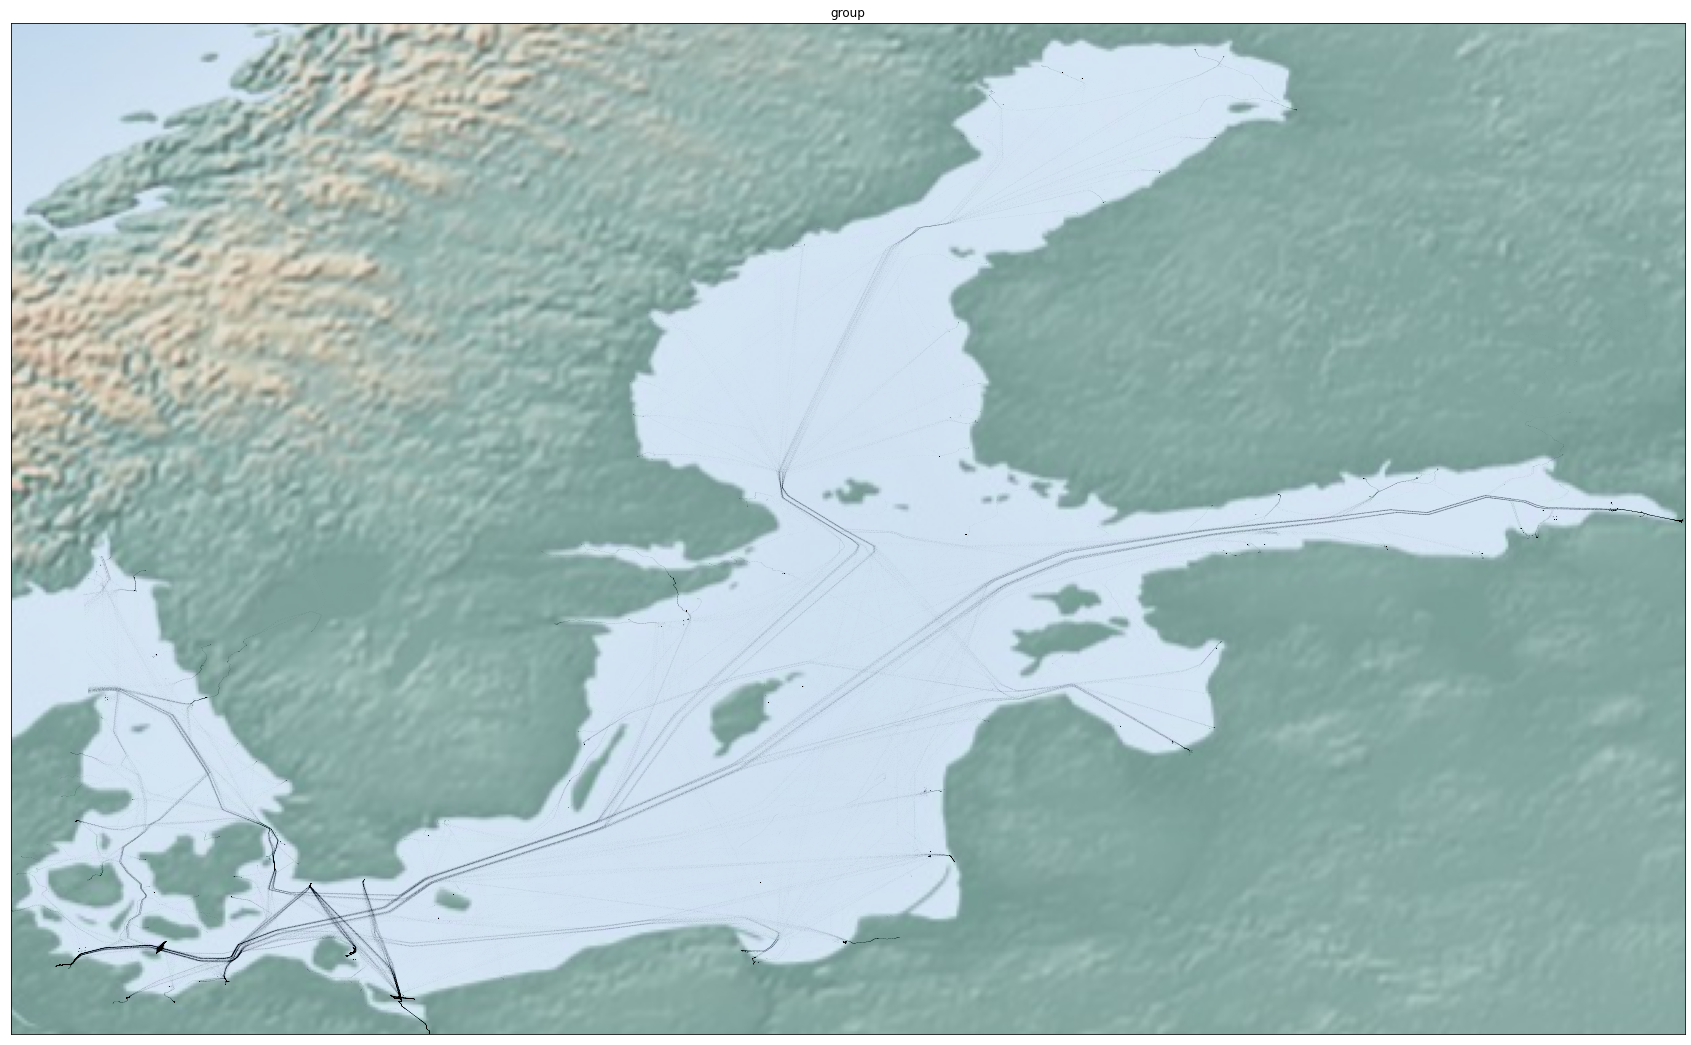

In [10]:
fig = plt.figure(figsize=(30,30))
plt.title("group")
m = Basemap(llcrnrlon = ais_moving.lon.min(),llcrnrlat = ais_moving.lat.min(), urcrnrlon = ais_moving.lon.max(),
       urcrnrlat = ais_moving.lat.max(),
       resolution='l')
m.shadedrelief()
xy = ais_moving.loc[:, ('lat', 'lon')]
plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='black', alpha=0.005, markersize=1)
plt.show()

In [11]:
print(ais.timestamp.min())
print(ais[ais.timestamp < '2018-03-01'].timestamp.max())
print(ais[ais.timestamp > '2018-03-01'].timestamp.min())
print(ais.timestamp.max())

2017-01-11 09:09:00
2018-02-10 23:54:00
2018-03-01 00:02:00
2018-12-10 23:57:00


In [12]:
print('len of ais:        ', len(ais.mmsi))
print('len of aismoving:  ', len(ais_moving.mmsi))

len of ais:         1048575
len of aismoving:   735616


In [13]:
print('Unique vessels:', len(ais_moving.mmsi.drop_duplicates()))

Unique vessels: 144


In [14]:
# Vessel type distribution
(ais_moving.vessel_type.dropna().value_counts(normalize=True)*100)

GC      51.969914
CONT    20.655614
PAS     17.822342
T        9.204123
RORO     0.348008
Name: vessel_type, dtype: float64

In [15]:
ais_types = ais.groupby('vessel_type')
rows = []
for vessel_type, observations in ais_types:
    print(vessel_type + ' Mean speed:', observations.speed.mean())
    print(vessel_type + ' Median speed:', observations.speed.median())
    rows.append([vessel_type, observations.speed.mean()])
    
mean_speeds = pd.DataFrame(rows, columns=['Vessel Type', 'Mean Speed (m/s)'])

CONT Mean speed: 5.416165472044406
CONT Median speed: 6.64
GC Mean speed: 3.251443930754824
GC Median speed: 4.42
PAS Mean speed: 4.336611981539381
PAS Median speed: 5.2
RORO Mean speed: 4.1662614379084895
RORO Median speed: 4.99
T Mean speed: 3.649374153262467
T Median speed: 4.94


<AxesSubplot:xlabel='Vessel Type'>

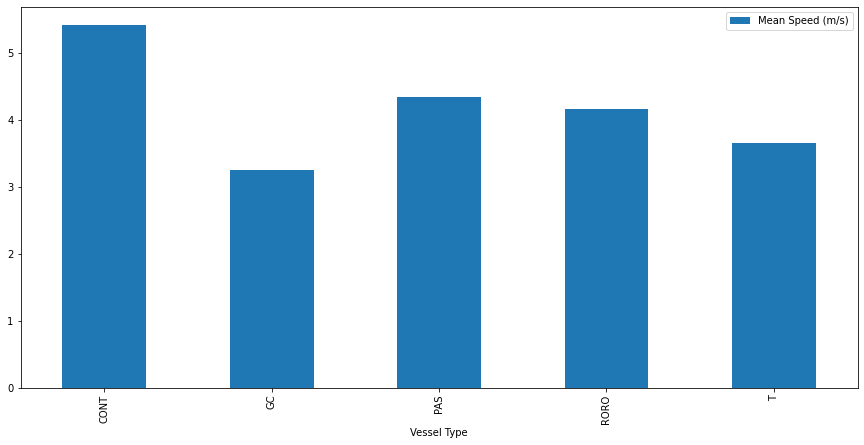

In [16]:
mean_speeds = mean_speeds.set_index('Vessel Type')
mean_speeds.plot(kind='bar',figsize=(15,7))

##### Describing AIS observations by vessel types

<AxesSubplot:>

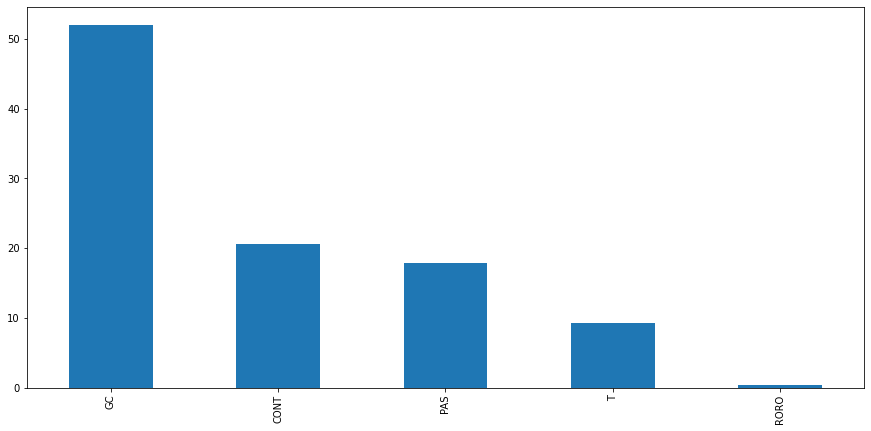

In [17]:
# The most common vessel types in AIS observations
(ais_moving.vessel_type.dropna().value_counts(normalize=True)*100).plot(kind='bar',figsize=(15,7))

In [18]:
type_groups = ais.vessel_type.dropna().drop_duplicates().reset_index(drop=True)
type_groups = type_groups.to_dict()
type_groups = {v: k for k, v in type_groups.items()}
type_groups

{'T': 0, 'RORO': 1, 'GC': 2, 'CONT': 3, 'PAS': 4}

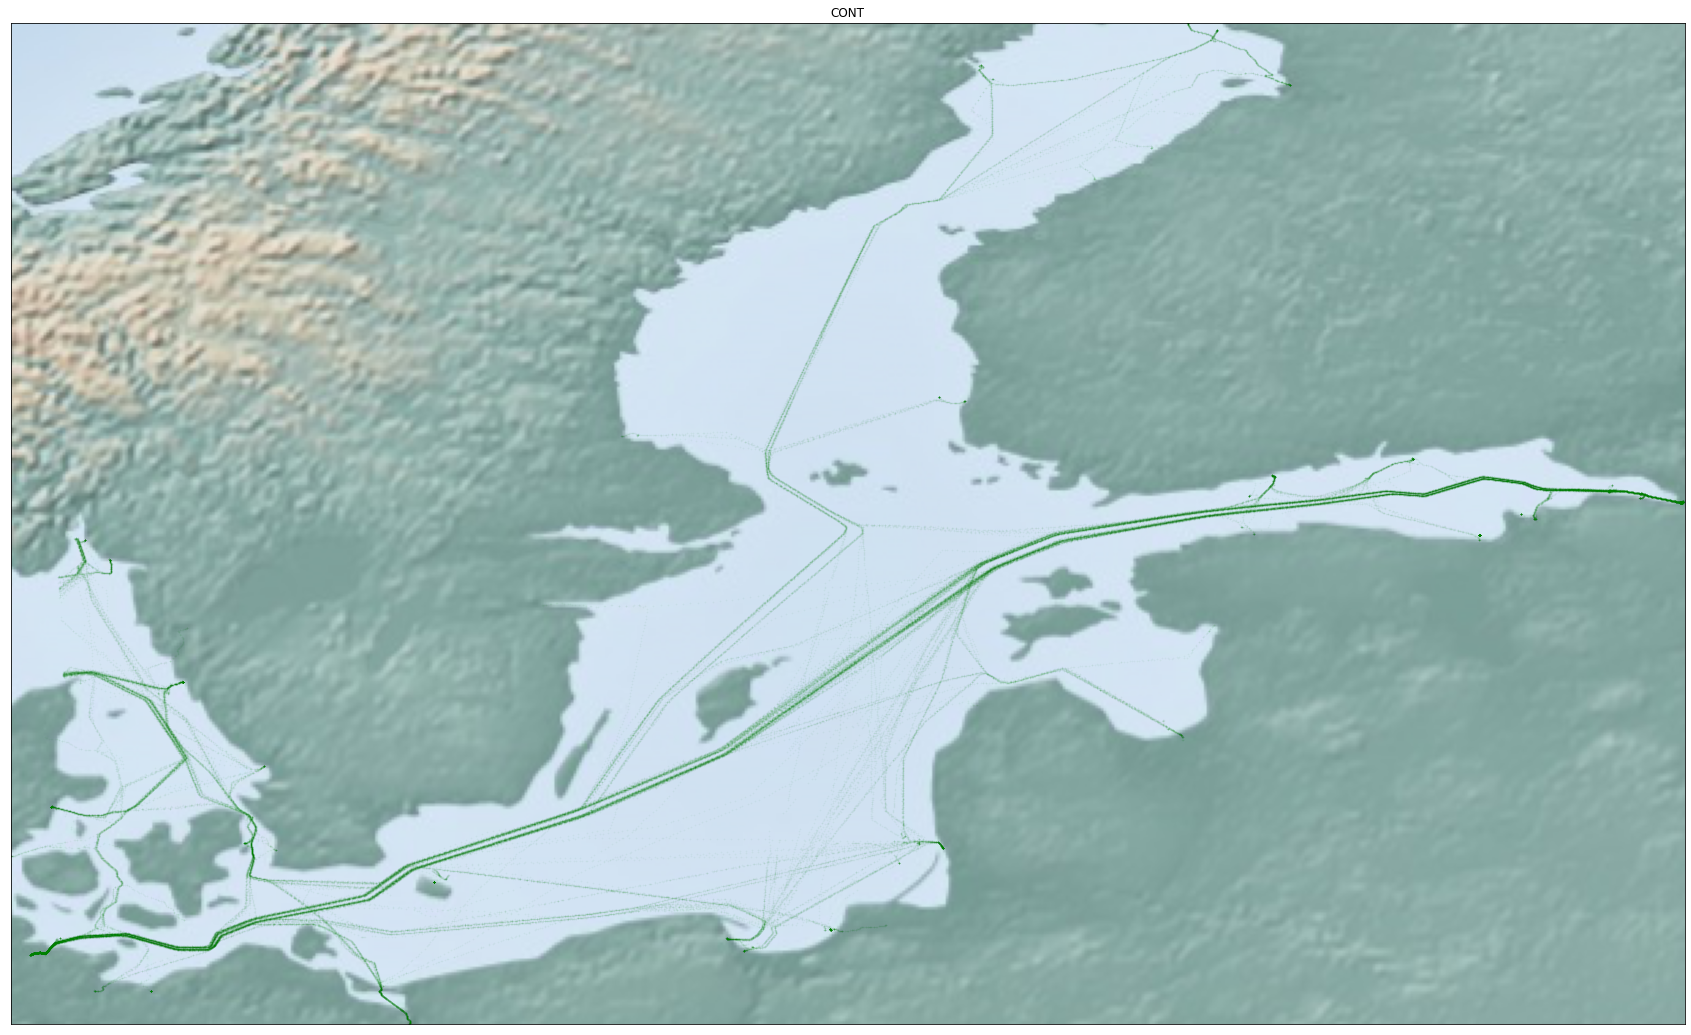

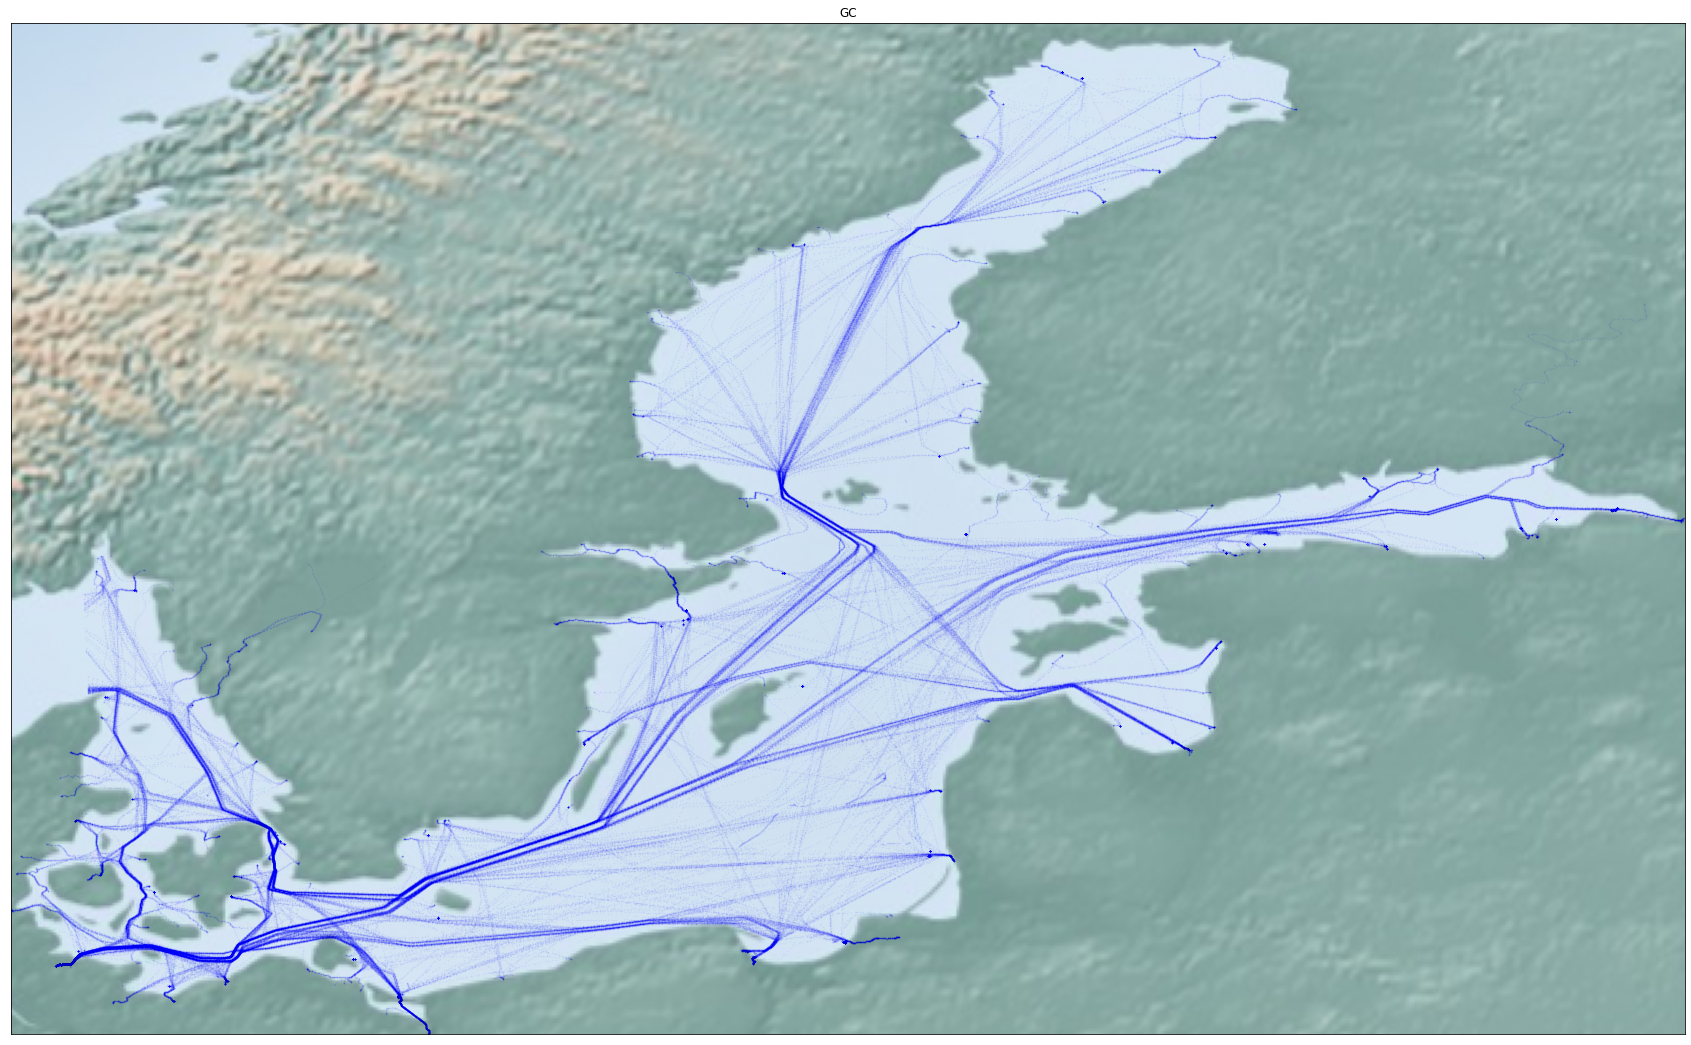

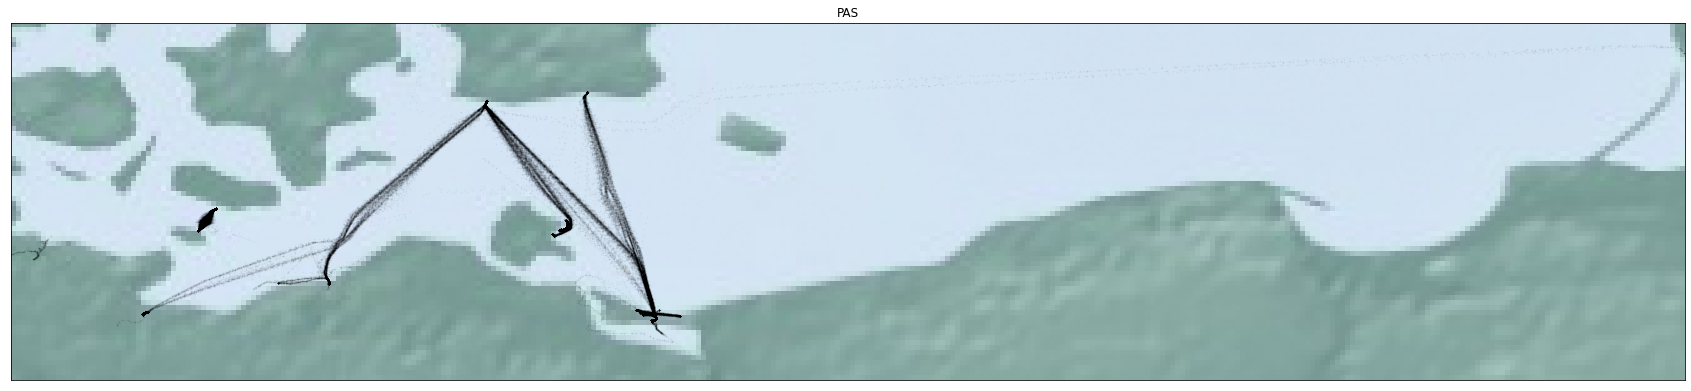

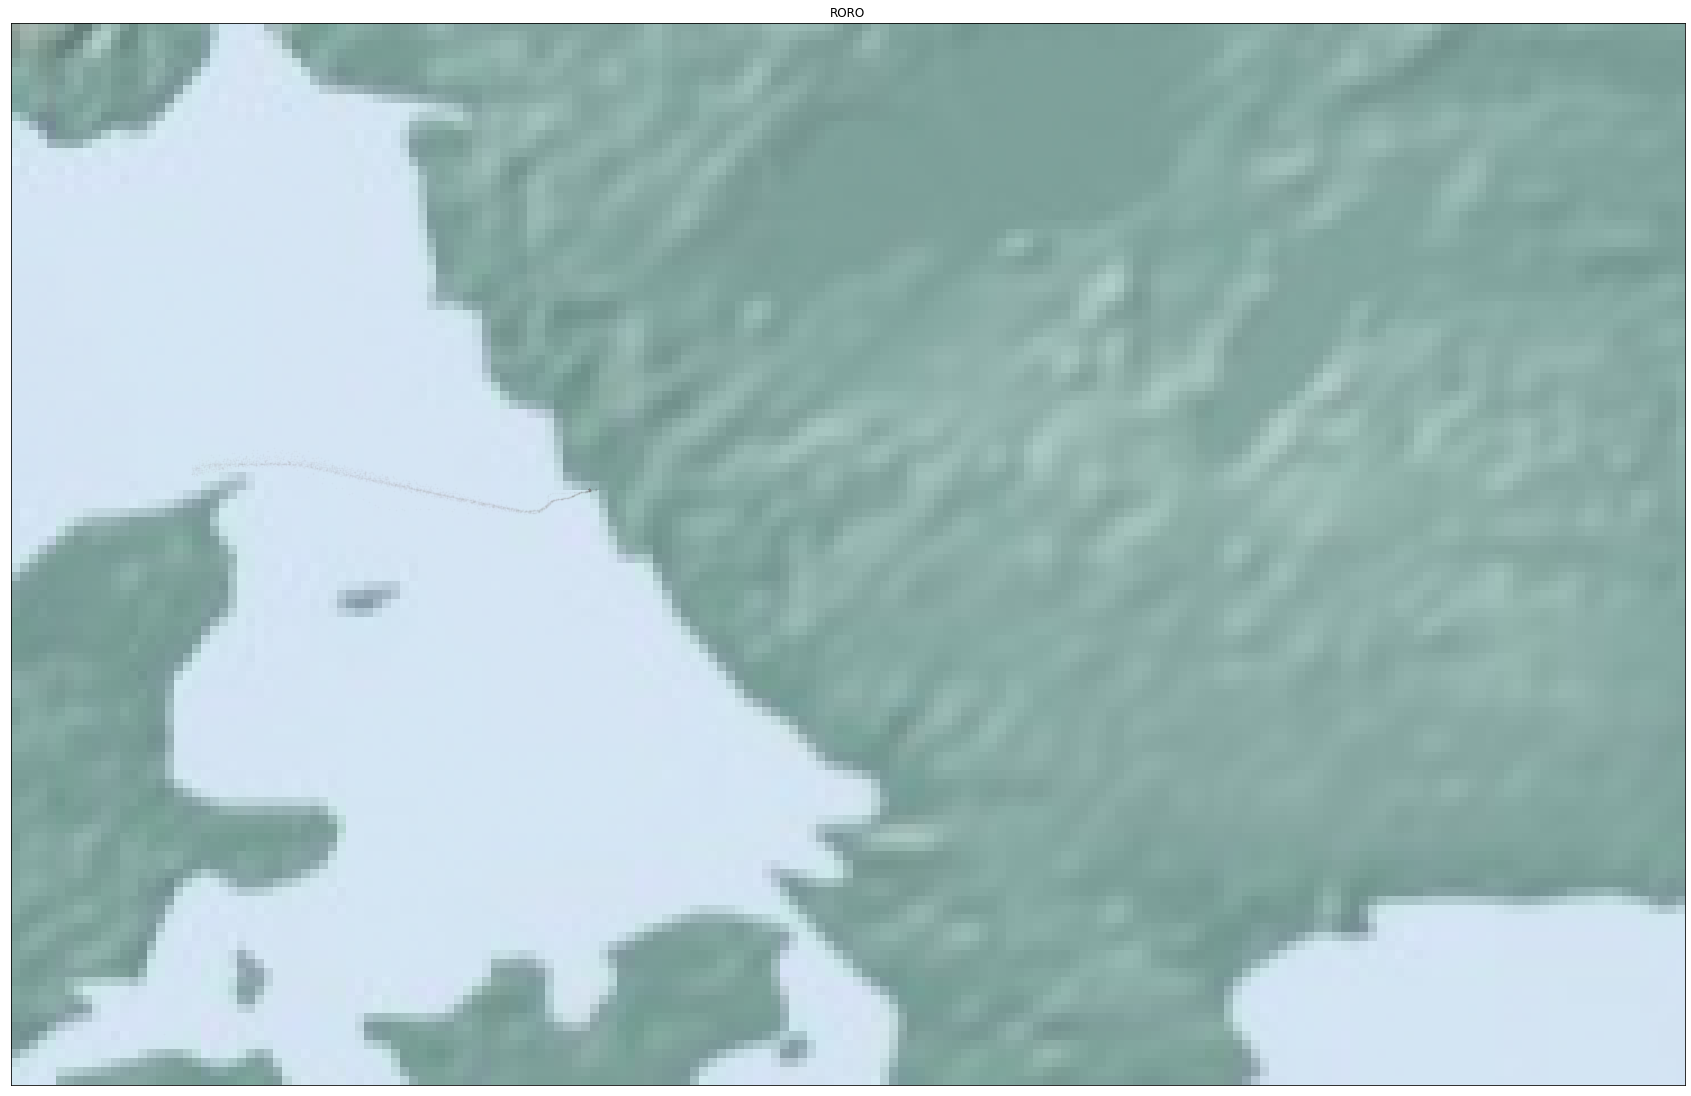

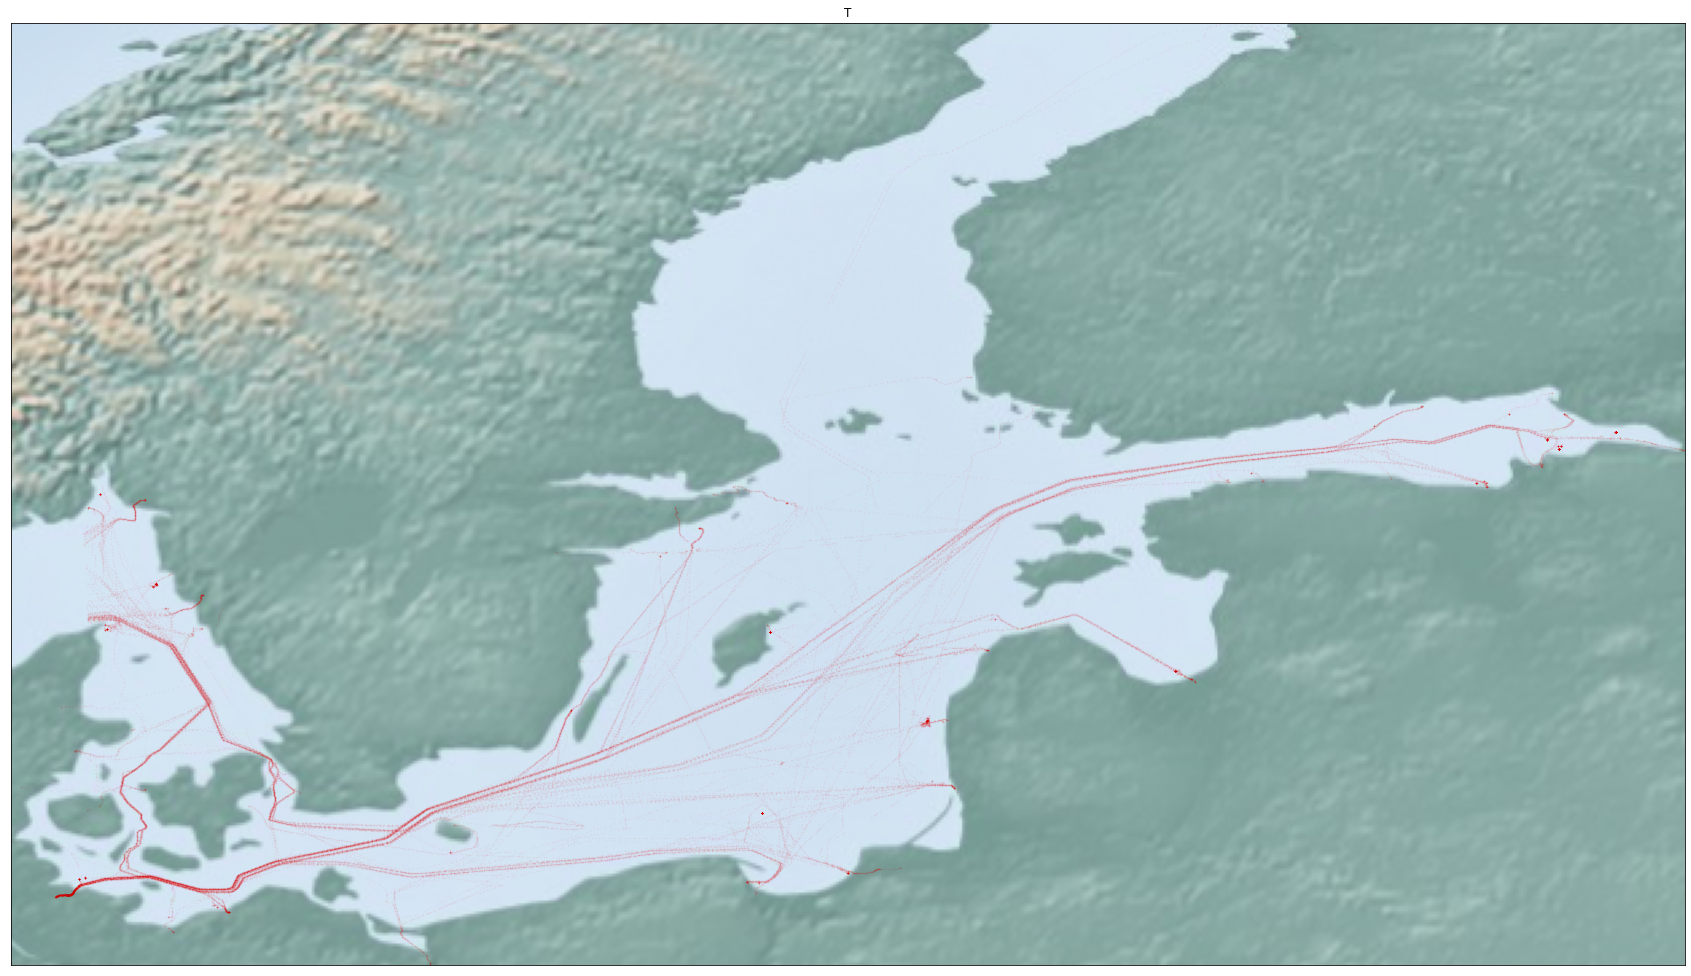

In [19]:
ais_summer_draft_groups = ais_moving.groupby('vessel_type')
#colors = {1:'red', 2:'blue', 3:'green', 4:'black', 5:}

colors = ['red', 'grey', 'blue', 'green', 'black']

for group, observations in ais_summer_draft_groups:
    fig = plt.figure(figsize=(30,30))
    plt.title(group)
    m = Basemap(llcrnrlon = observations.lon.min(),llcrnrlat = observations.lat.min(), urcrnrlon = observations.lon.max(),
           urcrnrlat = observations.lat.max(),
           resolution='l')
    m.shadedrelief()
    xy = observations.loc[:, ('lat', 'lon')]
    color = colors[type_groups[group]]
    plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c=color, alpha=0.025, markersize=1)
    plt.show()